## HW-1 • Math 189 • Wi 2024
### Due Date: Wed, Jan 24

> NAME: $\color{red}{\text{    Phu Dang     }}$
> 
> PID: $\color{red}{\text{    A16913100     }}$
>
> 

---

## Instructions
* Submit your solutions online on Gradescope
* Look at the detailed instructions [here](https://ucsd-math189-wi24.github.io/syllabus.html#assignments)


I certify that the following write-up is my own work, and have abided by the UCSD Academic Integrity Guidelines.

- [x] Yes
- [ ] No

---

# Question 1

For this question you will use the class data from HW-0 to generate insights with the help of `pandas`

The dataset `student_data_189.csv` is available on Github [here](https://github.com/ucsd-math189-wi24/materials) or on Canvas in the Files tab. 

<br></br>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


a. Read the dataset as a pandas dataframe and print the first 5 rows of the dataframe.

In [25]:
df = pd.read_csv("data/student_data_189.csv")
df.head()

,name,fav_color,math183_excited,seat_comfort,year,major,wi24_credits,time_reading,time_physical,time_online,sex
0,student 1,Purple,Very excited,Meh,3,Engineering,16,1.0,0.5,8.0,M
1,student 2,Pink,Very excited,Meh,4,Social Sciences,20,0.5,1.0,1.5,F
2,student 3,black,Super stoked,Meh,3,Data Science,16,0.0,2.0,2.0,M
3,student 4,NaN,Slightly excited,Meh,3,Data Science,12,0.1,1.0,2.0,M
4,student 5,red,Slightly excited,Meh,4,Engineering,16,0.0,2.0,3.0,M


b. Print the number of variables and the number of observations in the dataset.

In [26]:
print(f"Number of Variables: {df.shape[1]}\nNumber of Observations: {df.shape[0]}")

Number of Variables: 11
Number of Observations: 275


c. Describe the type for each variable you answered in your survey. 

In [27]:
# use df.columns to get the column names
possible_types = ['categorical', 'ordinal', 'discrete quantitative', 'continuous quantitative']

In [28]:
df.columns

Index(['name', 'fav_color', 'math183_excited', 'seat_comfort', 'year', 'major',
       'wi24_credits', 'time_reading', 'time_physical', 'time_online', 'sex'],
      dtype='object')

In [29]:
df['seat_comfort'].unique()

array(['Meh', 'Awful', 'Bad', 'Pretty good', 'Super comfy', nan],
      dtype=object)

**Answer**:

name: categorical \
fav_color: categorical \
math183_excited: ordinal \
seat_comfort: ordinal \
year: ordinal \
major: categorical \
wi24_credits: discrete quantitative \
time_reading: continuous quantitative \
time_physical: continuous quantitative \
time_online: continuous quantitative \
sex: categorical

d. create a boxplot of the number of hours of physical activity by sex. Do you see any differences?

Text(0.5, 1.0, 'Dist of MATH 189 students hours of phys. activity by gender')

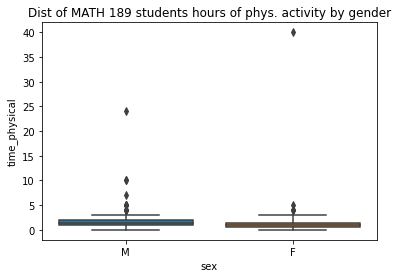

In [35]:
sns.boxplot(data=df, y='time_physical', x='sex');
plt.title("Dist of MATH 189 students hours of phys. activity by gender")

**Comment**: The two boxplots are similar with male showing slightly higher median hours of physical activity, as well as higher lower quartile and upper quartile. The interquartile ranges are similar across two sexes, as well as the range (excluding outliers). Both boxplots have outliers with the female distribution possessing a significantly high outlier at 40 hours.

e. create a boxplot of the number of credits taken by sex. Do you see any differences?

Text(0.5, 1.0, 'Dist of MATH 189 students wi24 credits by gender')

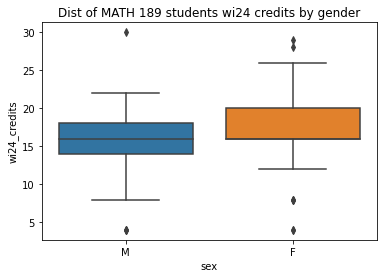

In [36]:
sns.boxplot(data=df, y='wi24_credits', x='sex');
plt.title("Dist of MATH 189 students wi24 credits by gender")

In [37]:
df[(df['sex']=='F')]['wi24_credits'].median() == df[(df['sex']=='M')]['wi24_credits'].median()

True

**Comment**: The two boxplots have the same median at 16 credits, including similar interquartile ranges. Notably, the female distribution lies at higher credit counts as indicated by (outliers excluded) higher min, max, lower quartile, and upper quartile.

e. create a scatterplot of the number of hours of physical activity vs. the number of hours online. Do you see any patterns?

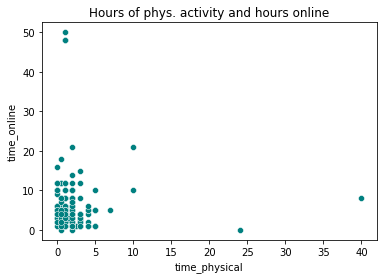

In [84]:
sns.scatterplot(data=df, x='time_physical', y='time_online', color='teal')
plt.title("Hours of phys. activity and hours online");

**Comment**: The data points cluster at the region below 5 hours of physical activity and below 10 hours online. Excluding outliers, the data possesses a positive association; however, the cluster undermines this observation as the majority of points lie in the cluster. Extreme outliers represent the two extreme cases where a student either spent lots of time with physical activity and little time online, or lots of time online with little time of physical activity.

f. create a bar chart for the overall comfort in the classroom's seating

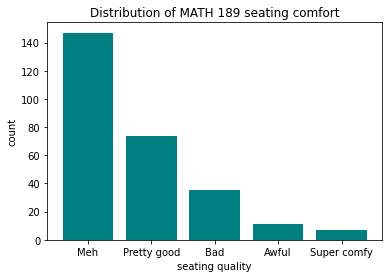

In [42]:
seatComfortCounts = df['seat_comfort'].value_counts()
plt.bar(seatComfortCounts.keys().tolist(), seatComfortCounts.tolist(), color="teal")
plt.xlabel("seating quality")
plt.ylabel("count")
plt.title("Distribution of MATH 189 seating comfort");

g. create another column called `fav_color_simplified` which keeps the five most popular `fav_colors` as is, but changes every other color to `other`. Create a bar chart of the new column `color`.

In [43]:
# determine the three most popular colors here
# Hint: you can use the .value_counts() for this
df['fav_color'] = df['fav_color'].str.lower() 
popular_colors = df['fav_color'].value_counts()[:5].keys().tolist()
popular_colors

['blue', 'green', 'black', 'purple', 'red']

In [44]:
df['fav_color'].unique()

array(['purple', 'pink', 'black', nan, 'red', 'white', 'skyblue', 'blue',
       'green', 'grey', 'yellow', 'ocean blue', 'lavender', 'aquamarine',
       'purple/lavender', 'blue.', 'beige', 'forest green', 'turquoise',
       'blazck', 'blue !', 'sky blue', 'pastel blue', 'orange', 'gold',
       'dark blue/purple', 'lavendar', 'brown', 'silver', 'rice white',
       'aria', 'blue/red', 'sapphire', 'magenta', 'light green',
       'cornflower blue', "i don't know", 'baby blue', 'cornsilk',
       "blue but i'm a fan of teal", '1', 'coral', 'clear'], dtype=object)

In [45]:
df['fav_color_simplified'] = df['fav_color'].apply(lambda x: "other" if x not in popular_colors else x)

In [46]:
df['fav_color_simplified'].value_counts()

other     99
blue      70
green     31
black     29
purple    23
red       23
Name: fav_color_simplified, dtype: int64

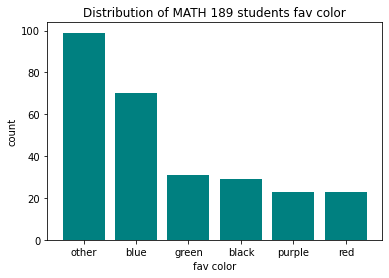

In [83]:
# insert your plot code here
favColorCounts = df['fav_color_simplified'].value_counts()
plt.bar(favColorCounts.keys().tolist(), favColorCounts.tolist(), color="teal")
plt.xlabel("fav color")
plt.ylabel("count")
plt.title("Distribution of MATH 189 students fav color");

---

# Question 2

Consider the following list:

In [48]:
my_list = [
    "+0.07",
    "-0.07",
    "+0.25",
    "-0.84",
    "+0.32",
    "-0.24",
    "-0.97",
    "-0.36",
    "+1.76",
    "-0.36"
]

a. What type of data type does the list contain?

**Answer**: The list contains values with data type **string** <br>
--> <code> type(my_list[0]) </code> = str

b. Create two new lists called `my_list_float`, `my_vec_int` and `my_array` which converts `my_list` to Float, Integer and `numpy array` types, respectively, 

In [50]:
my_list_float = [float(datum) for datum in my_list]
my_list_int = [int(np.round(float(datum))) for datum in my_list]
my_array = np.array([float(datum) for datum in my_list])

In [54]:
my_list_float, print(type(my_list_float[0]))

<class 'float'>


([0.07, -0.07, 0.25, -0.84, 0.32, -0.24, -0.97, -0.36, 1.76, -0.36], None)

In [55]:
my_list_int, print(type(my_list_int[0]))

<class 'int'>


([0, 0, 0, -1, 0, 0, -1, 0, 2, 0], None)

In [57]:
print(type(my_array[0]))
my_array

<class 'numpy.float64'>


array([ 0.07, -0.07,  0.25, -0.84,  0.32, -0.24, -0.97, -0.36,  1.76,
       -0.36])

c. what is the difference between `my_list_float` and `my_array`? e.g., what happens when you multiply them by 2?

In [58]:
my_list_float * 2

[0.07,
 -0.07,
 0.25,
 -0.84,
 0.32,
 -0.24,
 -0.97,
 -0.36,
 1.76,
 -0.36,
 0.07,
 -0.07,
 0.25,
 -0.84,
 0.32,
 -0.24,
 -0.97,
 -0.36,
 1.76,
 -0.36]

In [59]:
my_array * 2

array([ 0.14, -0.14,  0.5 , -1.68,  0.64, -0.48, -1.94, -0.72,  3.52,
       -0.72])

**Answer**: When multiplying <code>my_list_float</code> by 2, the result is another copy of <code>my_list_float</code> appended to the end of the list, resulting in a list twice the original length of <code>my_list_float</code>. Whereas when multiplying <code>my_array</code> by 2, the result is an array with the same dimension as original with each value doubled through element-wise multiplication by 2.

d.  Let's call `my_array` as `x`. Compute the $\ell_2$ and $\ell_1$ norm of `x`, and compute the dot product of `x` with itself.

In [61]:
l2_norm = np.sqrt(sum(my_array**2))
l1_norm = sum(abs(my_array))
x_dot_x = np.dot(my_array, my_array)

In [63]:
print(f'l2 norm: {l2_norm}')
print(f'l1 norm: {l1_norm}')
print(f'x dot x: {x_dot_x}')

l2 norm: 2.28814335215257
l1 norm: 5.24
x dot x: 5.2356


e. Let $A$ be the following matrix:

In [65]:
np.random.seed(42)
A = np.random.randn(1000, 10)

In [66]:
A.shape

(1000, 10)

Find the row-wise and column-wise mean of $A$.

In [67]:
row_mean = np.mean(A, axis=1)
col_mean = np.mean(A, axis=0)

In [71]:
print(row_mean[:10])
row_mean.size

[ 0.44806111 -0.79065823 -0.22184356 -0.31010667 -0.25282217  0.19944143
 -0.01505699 -0.04773612  0.10144743 -0.14919139]


1000

In [73]:
print(col_mean)
col_mean.size

[ 0.01078754  0.03129239 -0.02254179 -0.04307534  0.0136216  -0.02925192
 -0.00268887  0.00549542 -0.0231036   0.03810474]


10

f. Find the top 2 eigenvalues and eigenvectors of $A^{\top}A$.

In [74]:
eigenvalues, eigenvectors = np.linalg.eig(np.dot(A.transpose(), A))
top2_eigenvalues = np.sort(eigenvalues)[-2:]
top2_eigenvectors = eigenvectors[:, np.argsort(eigenvalues)[::-1][:2]]

In [75]:
top2_eigenvalues

array([1114.28615619, 1170.65372153])

In [76]:
top2_eigenvectors

array([[ 0.16316944, -0.00556311],
       [-0.01221066,  0.57900671],
       [ 0.08944438, -0.14820655],
       [-0.18573084,  0.12693205],
       [-0.11024969,  0.17805303],
       [-0.5055767 , -0.55992381],
       [ 0.64029851,  0.06423441],
       [-0.439668  ,  0.45026517],
       [-0.21951186,  0.27241505],
       [-0.10720078,  0.01873678]])

g. Let $v$ be the vector obtained by **summing** the squares of the rows of $A$. Plot the histogram of $v$ with the $Y-$axis to show the **_normalized frequency_** of each bin.

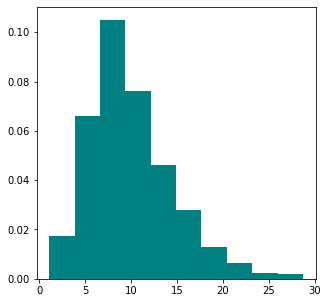

In [77]:
v = np.sum(A**2, axis=1)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# plot the histogram here
plt.hist(v, density=True, color="teal");

h. Using the same `fig, ax` objects from part (g). overlay the probability density function of the $\chi^2(10)$ distribution—the `chi2` distribution with 10 degrees.

In [78]:
import scipy.stats as stats

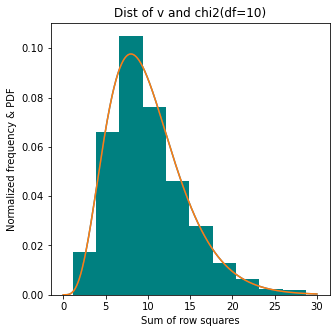

In [82]:
x_range = np.linspace(0, 30, 1000)
y = stats.chi2.pdf(x_range, df=10)

ax.plot(x_range, y)
ax.set_xlabel('Sum of row squares')
ax.set_ylabel('Normalized frequency & PDF')
ax.set_title('Dist of v and chi2(df=10)')
fig

i. What do you observe in the previous plot? Why do you think this is the case?

**Answer**: The PDF of the $\chi^2(10)$ distribution follows the density of the distribution of v quite well. This is because the $\chi^2$ distribution with 10 degrees of freedom is analogous to the distribution of the sum of squares of 10 standard normal random variables, which is how v was generated using A, whose values (10 per instance) are from the standard normal distribution.